In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import random
import scipy.stats as st

from pydnb.dnb import DNB

In [2]:
def change(A,state):
    if random.random() > max(A[state]):
        return int(not(state))
    else:
        return state
    
def generate_dataset(A,B,size=1000):
    Y = []
    X = []
    state=random.randint(0,len(A)-1)
    for i in range(size):
        Y.append(state)
        X.append(np.random.randn()*B[state][1]+B[state][0])
        state=change(A,state)
    df = pd.DataFrame({'state':Y,'obs':X})
    return df

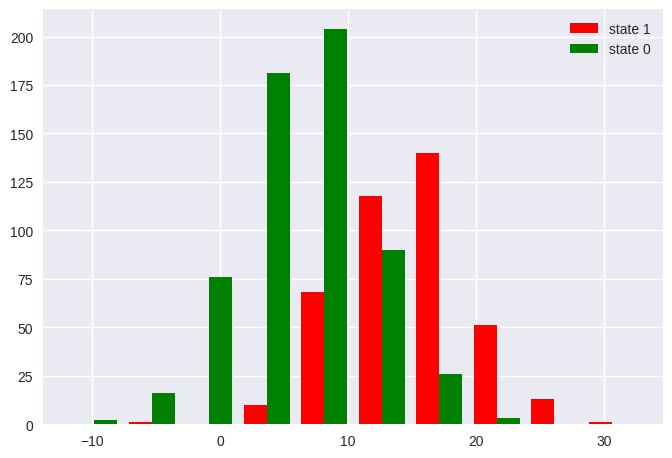

In [3]:
A = np.array([[0.7,0.3],[0.4,0.6]])
B = [[6,5],[15,5]]
df = generate_dataset(A,B)
plt.hist([df[df['state']==1].obs,df[df.state==0].obs],stacked=False, color = ['r','g'])
plt.legend(['state 1','state 0']);

In [4]:
hmm = DNB()
hmm.mle(df,'state',features = {'obs':st.norm});

In [5]:
pd.DataFrame(hmm.A)

,0,1
0,0.720268,0.279732
1,0.415423,0.584577


In [6]:
pd.DataFrame(hmm.B)

,0,1
,obs,obs
0,6.390743,14.703418
1,5.047134,4.935147


In [7]:
print(hmm.emission_prob(0,df.iloc[2]))
print(hmm.transition_prob(0,1))

0.00564645003217
0.2797319933


In [8]:
sum(hmm._forward(df,k=10))

-17642.722573169296

In [9]:
df=hmm.sample(100)

In [10]:
hmm.seq_probability(df,df.state)

-366.37944662736061